# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do
For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not. Your output should look like the following:

`row_idx: is_waldo`, notice if the user is waldo your output should be 1

``` 
0: 1
1: 0
2: 0
3: 1
4: 1
...
```



In [2]:
SEED = 42

In [3]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv('task 1.csv')
train_df.head()

,index,browser,os,locale,user_id,location,sites,time,date
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13


In [5]:
train_df.user_id.value_counts()

0      400
55     131
82     127
148    122
120    121
      ... 
124     84
145     83
170     82
42      82
152     77
Name: user_id, Length: 200, dtype: int64

In [6]:
train_df['is_waldo'] = (train_df.user_id == 0).astype(np.int8)
train_df.head()

,index,browser,os,locale,user_id,location,sites,time,date,is_waldo
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28,0
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26,0
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13,0
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19,0
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13,0


<AxesSubplot: >

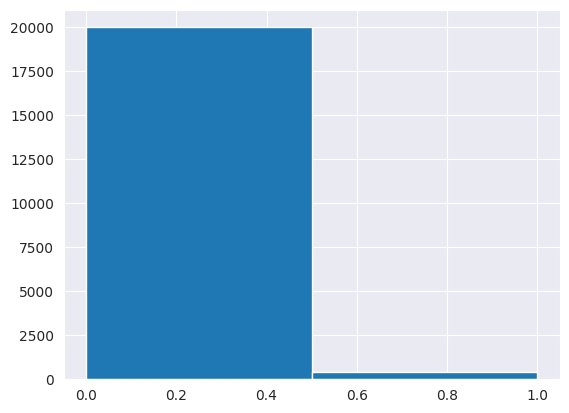

In [50]:
train_df.is_waldo.hist(bins=2)

In [52]:
from sklearn.utils import resample

# separate majority and minority classes
majority_class = train_df[train_df.is_waldo == 0]
minority_class = train_df[train_df.is_waldo == 1]

# Upsample minority class
minority_upsampled = resample(
    minority_class,
    replace=True,
    n_samples=len(majority_class),
    random_state=SEED
)

# Combine majority class with upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

<AxesSubplot: >

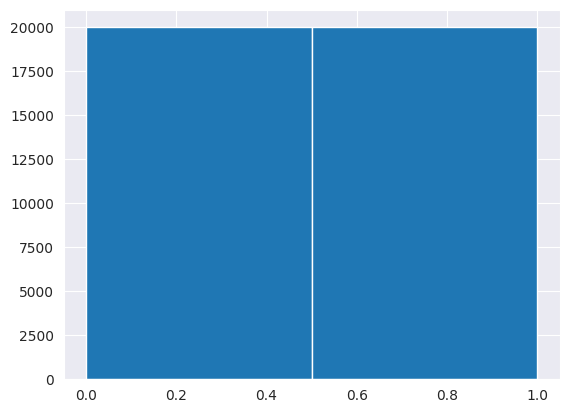

In [53]:
balanced_df.is_waldo.hist(bins=2)

In [187]:
raw_x = balanced_df.drop(columns=['user_id', 'index', 'sites', 'is_waldo'])
y = balanced_df.is_waldo

In [188]:
from sklearn.preprocessing import StandardScaler

time_scaler = StandardScaler()
date_scaler = StandardScaler()

X = raw_x.copy()
X.time = time_scaler.fit_transform(pd.to_datetime(raw_x.time).to_numpy().reshape((-1, 1)))
X.date = date_scaler.fit_transform(pd.to_datetime(raw_x.date).to_numpy().reshape((-1, 1)))

In [189]:
X = pd.get_dummies(X)
X.head()

,time,date,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,0.378908,-1.662906,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.902326,-0.444613,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.062822,-1.403080,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.793747,0.398376,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.105007,1.056600,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [191]:
import torch
from torch import nn

torch.manual_seed(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NUM_EPOCH = 15
NUM_NEURONS = 256
model = nn.Sequential(
    nn.Linear(X_train.shape[1], NUM_NEURONS),
    nn.ReLU(),
    nn.Linear(NUM_NEURONS, 1),
    nn.Sigmoid()
).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(NUM_EPOCH):
    model.train()
    optimizer.zero_grad()
    y_train_pred = model(torch.Tensor(X_train.values).to(device))
    train_loss = criterion(y_train_pred.squeeze(), torch.Tensor(y_train.values).float().to(device))
    train_loss.backward()
    optimizer.step()

    with torch.no_grad():
        model.eval()
        y_test_pred = model(torch.Tensor(X_test.values).to(device))
        test_loss = criterion(y_test_pred.squeeze(),
                              torch.Tensor(y_test.values).float().to(device)).item()

    print(f"Epoch {epoch + 1}/{NUM_EPOCH}\ttrain_loss={train_loss.item()}\t{test_loss=}")

Epoch 1/15	train_loss=0.6951892971992493	test_loss=0.6074297428131104
Epoch 2/15	train_loss=0.6081433296203613	test_loss=0.5235230326652527
Epoch 3/15	train_loss=0.5248865485191345	test_loss=0.4362680912017822
Epoch 4/15	train_loss=0.4380427598953247	test_loss=0.34679436683654785
Epoch 5/15	train_loss=0.3487860858440399	test_loss=0.26087045669555664
Epoch 6/15	train_loss=0.2629585862159729	test_loss=0.18576665222644806
Epoch 7/15	train_loss=0.18787723779678345	test_loss=0.12665365636348724
Epoch 8/15	train_loss=0.12874704599380493	test_loss=0.08460770547389984
Epoch 9/15	train_loss=0.08664211630821228	test_loss=0.05690915510058403
Epoch 10/15	train_loss=0.05882028117775917	test_loss=0.0393386110663414
Epoch 11/15	train_loss=0.041115857660770416	test_loss=0.028212495148181915
Epoch 12/15	train_loss=0.029873555526137352	test_loss=0.021022358909249306
Epoch 13/15	train_loss=0.02259816788136959	test_loss=0.016232900321483612
Epoch 14/15	train_loss=0.017744241282343864	test_loss=0.012939010

In [192]:
from sklearn.metrics import classification_report

y_pred = y_test_pred.cpu().detach().numpy().squeeze().round().astype(np.int8)
print(np.unique(y_pred, return_counts=True))
print(classification_report(y_test, y_pred, zero_division=0))

(array([0, 1], dtype=int8), array([3957, 4044]))
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3970
           1       1.00      1.00      1.00      4031

    accuracy                           1.00      8001
   macro avg       1.00      1.00      1.00      8001
weighted avg       1.00      1.00      1.00      8001



In [193]:
test_df = pd.read_csv('task_1_verify.csv')
raw_x = test_df.drop(columns=['sites'])
raw_x.head()

,browser,os,locale,location,time,date
0,Firefox,Windows 7,xh-ZA,USA/New York,11:30:00,2016-10-05
1,Chrome,Windows 10,pl-PL,Japan/Tokyo,14:35:00,2016-05-06
2,Firefox,Debian,vi-VN,France/Paris,14:31:00,2016-03-27
3,Firefox,Debian,en-US,Canada/Vancouver,10:55:00,2016-12-31
4,Firefox,Debian,en-CA,Australia/Sydney,03:30:00,2017-01-19


In [194]:
X = raw_x.copy()
X.time = time_scaler.transform(pd.to_datetime(raw_x.time).to_numpy().reshape((-1, 1)))
X.date = date_scaler.transform(pd.to_datetime(raw_x.date).to_numpy().reshape((-1, 1)))
X = pd.get_dummies(X)

for col in X_train.columns:
    if col not in X.columns:
        X[col] = 0
X.head()

,time,date,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,...,locale_en-SG,locale_es-MX,locale_it-IT,locale_ja-JP,locale_ro-RO,locale_wo-SN,location_Malaysia/Kuala Lumpur,location_Singapore/Singapore,location_USA/Miami,location_USA/San Francisco
0,-0.016803,-0.213658,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.429578,-1.091290,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.419926,-1.322246,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.101253,0.288671,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.174980,0.398376,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
pred = (model(torch.Tensor(X.values).to(device)).cpu().detach().numpy().squeeze() > 0.15).astype(np.int8)
for i, is_waldo in enumerate(pred):
    print(f'{i}: {is_waldo}')

0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 1
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 0
32: 0
33: 0
34: 0
35: 0


In [196]:
model(torch.Tensor(X.values).to(device)).cpu().detach().numpy()

array([[5.4074218e-05],
       [1.0128991e-02],
       [7.9019126e-05],
       [5.1199320e-05],
       [1.6020585e-02],
       [2.5262855e-04],
       [1.1661232e-05],
       [7.1738672e-05],
       [1.8425256e-01],
       [5.9603852e-05],
       [3.2501517e-05],
       [1.6341513e-03],
       [2.8896609e-05],
       [2.9164771e-04],
       [2.0404434e-04],
       [2.0770100e-04],
       [4.3260079e-04],
       [3.1299546e-04],
       [2.2832777e-03],
       [1.5003614e-05],
       [3.1307274e-05],
       [7.0228882e-05],
       [1.9499183e-05],
       [1.0338406e-03],
       [2.2325046e-04],
       [2.8723325e-05],
       [1.6507289e-05],
       [5.3250336e-05],
       [4.5787028e-04],
       [3.9622755e-05],
       [2.3697078e-04],
       [2.0246345e-03],
       [1.6215755e-04],
       [2.7937841e-04],
       [1.0224569e-03],
       [1.6800255e-04]], dtype=float32)

### Questions
1. Did you find any usefull insights from your data analysis?
    - *Answer*
2. What preprocessing techniques did you use? Why?
    - *Answer*
3. Describe the fine-tuning process and how you reached your model architecture.
    - *Answer*
4. Which metric did you try to optemize for this task? Why?
    - *Answer*

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
[Download link](https://drive.google.com/file/d/1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j/view?usp=share_link)

You will be working with the data in `task_2.zip` for identifying. The name of each image consists of 2 parts like
`idx_label.BMB`

Where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

In [ ]:
# TODO: Implement task 2

### Questions
1. What preprocessing techniques did you use? Why?
    - *Answer*
2. What data augmentation techniques did you use?
    - *Answer*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*
4. What techniques did you use to improve model’s performance other than data augmentation
    - *Answer*

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [ ]:
# TODO: Implement task 3

### Questions
1. How did the DT compare to the RF in performance? Why?
    - *Answer*
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - *Answer*
3. What is ensemble learning? What are its pros and cons?
    - *Answer*
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - *Answer*